In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

employee_df = pd.read_csv('C:/Users/Gumede/Downloads/archive (1)/Dataset/Test.csv')
hr_df = pd.read_csv('C:/Users/Gumede/Downloads/archive (2)/Dataset/Test.csv')

print("Employee Financial Dataset:")
print(employee_df.head())
print("HR Dataset:")
print(hr_df.head())

# Check for missing values in both datasets
print("Missing values in Employee Financial Dataset:")
print(employee_df.isnull().sum())
print("Missing values in HR Dataset:")
print(hr_df.isnull().sum())

# Function to fill missing values
def fill_missing_values(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].mean(), inplace=True)
        else:  # Categorical columns
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Apply missing value handling
employee_df = fill_missing_values(employee_df)
hr_df = fill_missing_values(hr_df)

# Verify missing values are handled
print("Missing values after handling in Employee Financial Dataset:")
print(employee_df.isnull().sum())
print("Missing values after handling in HR Dataset:")
print(hr_df.isnull().sum())

#Feature Engineering
# Converting categorical columns into numerical values

# Checking if 'Gender' column exists and convert it to numerical
if 'Gender' in employee_df.columns:
    employee_df['Gender'] = employee_df['Gender'].map({'M': 1, 'F': 0})

if 'Gender' in hr_df.columns:
    hr_df['Gender'] = hr_df['Gender'].map({'M': 1, 'F': 0})

# Check if 'Relationship_Status' column exists and convert it to numerical
if 'Relationship_Status' in employee_df.columns:
    employee_df['Relationship_Status'] = employee_df['Relationship_Status'].map({'Married': 1, 'Single': 0})

if 'Relationship_Status' in hr_df.columns:
    hr_df['Relationship_Status'] = hr_df['Relationship_Status'].map({'Married': 1, 'Single': 0})

# Useing One-Hot Encoding for columns with multiple categories
if 'Unit' in employee_df.columns and 'Decision_skill_possess' in employee_df.columns and 'Compensation_and_Benefits' in employee_df.columns:
    employee_df = pd.get_dummies(employee_df, columns=['Unit', 'Decision_skill_possess', 'Compensation_and_Benefits'], drop_first=True)

if 'Department' in hr_df.columns and 'Work_accident' in hr_df.columns:
    hr_df = pd.get_dummies(hr_df, columns=['Department', 'Work_accident'], drop_first=True)

#Preparing for Machine Learning
# Ensuring there are no string values in any of the columns and all columns are numerical
print("Employee Financial Dataset after preprocessing:")
print(employee_df.head())
print("HR Dataset after preprocessing:")
print(hr_df.head())

Employee Financial Dataset:
  Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_22713      F  32.0                5              Single  Springfield   
1    EID_9658      M  65.0                2              Single      Lebanon   
2   EID_22203      M  52.0                3             Married  Springfield   
3    EID_7652      M  50.0                5              Single   Washington   
4    EID_6516      F  44.0                3             Married     Franklin   

        Unit Decision_skill_possess  Time_of_service  Time_since_promotion  \
0        R&D             Conceptual              7.0                     4   
1         IT              Directive             41.0                     2   
2      Sales              Directive             21.0                     3   
3  Marketing             Analytical             11.0                     4   
4        R&D             Conceptual             12.0                     4   

   ...  Pay_Scale  Com

C:\Users\Gumede\AppData\Local\Temp\ipykernel_13816\2296086278.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Gumede\AppData\Local\Temp\ipykernel_13816\2296086278.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

  Employee_ID  Gender   Age  Education_Level  Relationship_Status  \
0   EID_22713       0  32.0                5                    0   
1    EID_9658       1  65.0                2                    0   
2   EID_22203       1  52.0                3                    1   
3    EID_7652       1  50.0                5                    0   
4    EID_6516       0  44.0                3                    1   

      Hometown  Time_of_service  Time_since_promotion  growth_rate  \
0  Springfield              7.0                     4           30   
1      Lebanon             41.0                     2           72   
2  Springfield             21.0                     3           25   
3   Washington             11.0                     4           28   
4     Franklin             12.0                     4           47   

   Travel_Rate  ...  Unit_R&D  Unit_Sales  Unit_Security  \
0            1  ...      True       False          False   
1            1  ...     False       False   

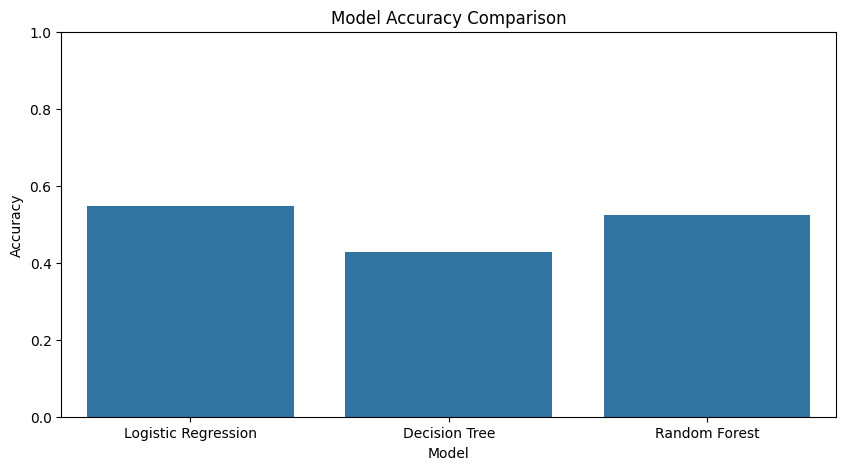

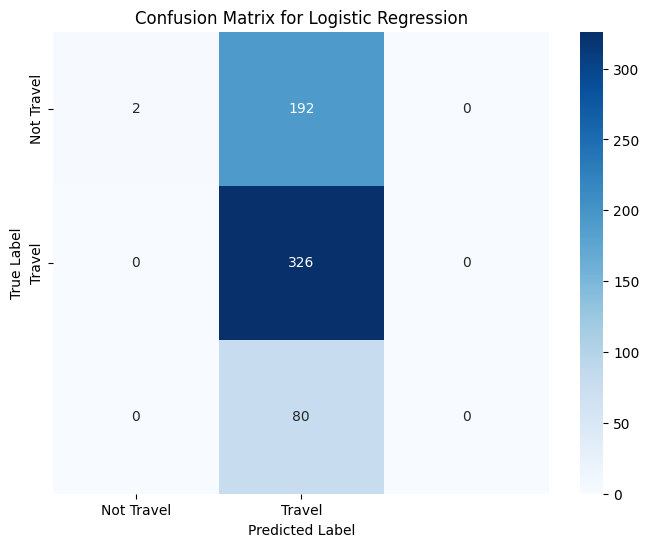

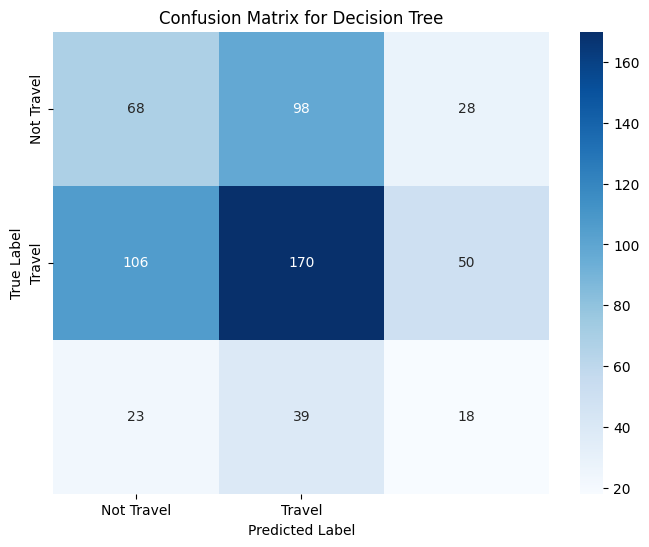

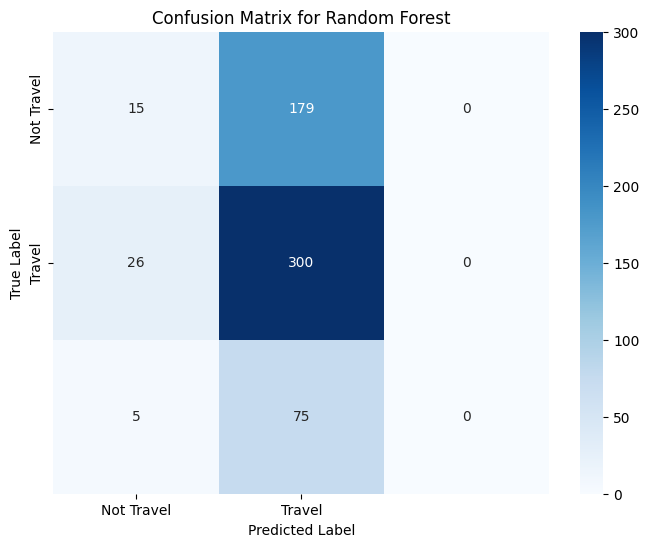

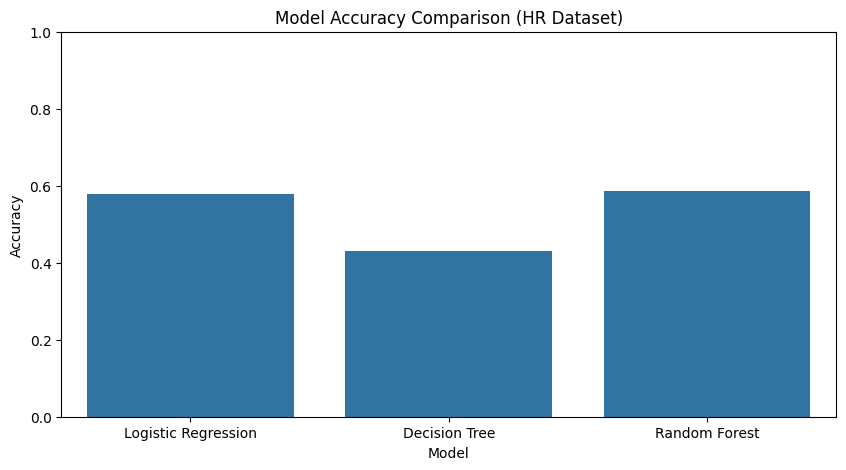

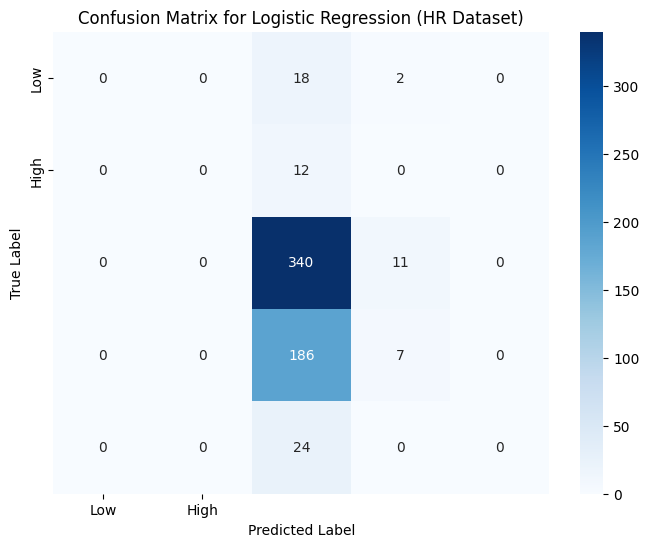

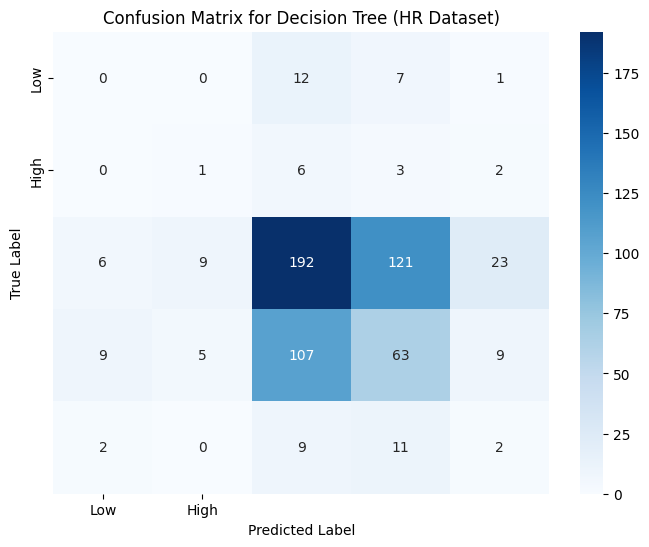

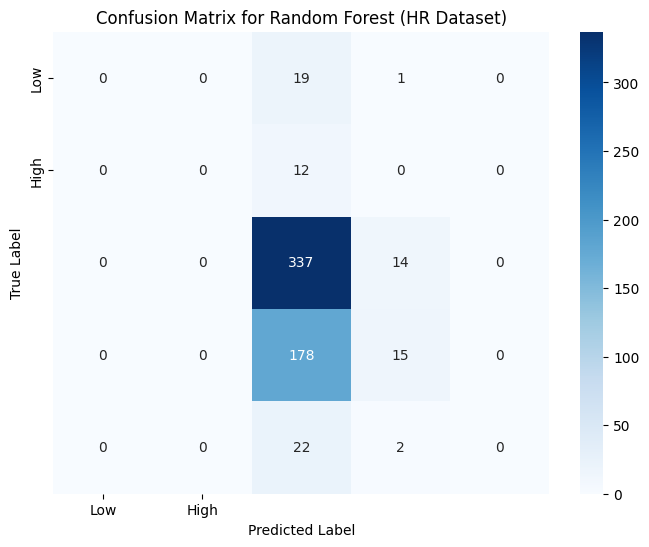

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Define feature variables (X) and target variable (y) from the employee dataset
X_employee = employee_df.drop(columns=['Employee_ID', 'Travel_Rate'])
y_employee = employee_df['Travel_Rate'] 

#Identifying categorical and numerical columns for the employee dataset
categorical_cols = ['Gender', 'Education_Level', 'Hometown']
numerical_cols = X_employee.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 4: Creating a ColumnTransformer for preprocessing
preprocessor_employee = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

#Creating pipelines for each model
models = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor_employee),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', 'passthrough', numerical_cols),
                ('cat', OneHotEncoder(), categorical_cols)
            ])),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', 'passthrough', numerical_cols),
                ('cat', OneHotEncoder(), categorical_cols)
            ])),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

#Spliting the employee dataset into training and testing sets
X_train_employee, X_test_employee, y_train_employee, y_test_employee = train_test_split(X_employee, y_employee, test_size=0.2, random_state=42)

#Training and evaluate models, and store results for visualization
results = {}
for model_name, pipeline in models.items():
    pipeline.fit(X_train_employee, y_train_employee)
    y_pred = pipeline.predict(X_test_employee)
    accuracy = accuracy_score(y_test_employee, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test_employee, y_pred)
    }

#Ploting model accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=[results[m]['accuracy'] for m in results])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#Ploting confusion matrices for each model
for model_name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Travel', 'Travel'], yticklabels=['Not Travel', 'Travel'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#Now for the HR dataset
X_hr = hr_df.drop(columns=['Employee_ID', 'Compensation_and_Benefits']) 
y_hr = hr_df['Compensation_and_Benefits']  

#Identifying categorical and numerical columns for the HR dataset
categorical_cols_hr = ['Gender', 'Education_Level', 'Unit']  
numerical_cols_hr = X_hr.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Creating pipelines for each model on HR dataset
models_hr = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_cols_hr),
                ('cat', OneHotEncoder(), categorical_cols_hr)
            ])),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', 'passthrough', numerical_cols_hr),
                ('cat', OneHotEncoder(), categorical_cols_hr)
            ])),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', 'passthrough', numerical_cols_hr),
                ('cat', OneHotEncoder(), categorical_cols_hr)
            ])),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

#Spliting the HR dataset into training and testing sets
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_hr, test_size=0.2, random_state=42)

#Training and evaluating models on HR dataset, and store results for visualization
results_hr = {}
for model_name, pipeline in models_hr.items():
    pipeline.fit(X_train_hr, y_train_hr)
    y_pred_hr = pipeline.predict(X_test_hr)
    accuracy_hr = accuracy_score(y_test_hr, y_pred_hr)
    results_hr[model_name] = {
        'accuracy': accuracy_hr,
        'confusion_matrix': confusion_matrix(y_test_hr, y_pred_hr)
    }

#Ploting model accuracies for HR dataset
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results_hr.keys()), y=[results_hr[m]['accuracy'] for m in results_hr])
plt.title('Model Accuracy Comparison (HR Dataset)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#Ploting confusion matrices for each model on HR dataset
for model_name, result in results_hr.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f'Confusion Matrix for {model_name} (HR Dataset)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


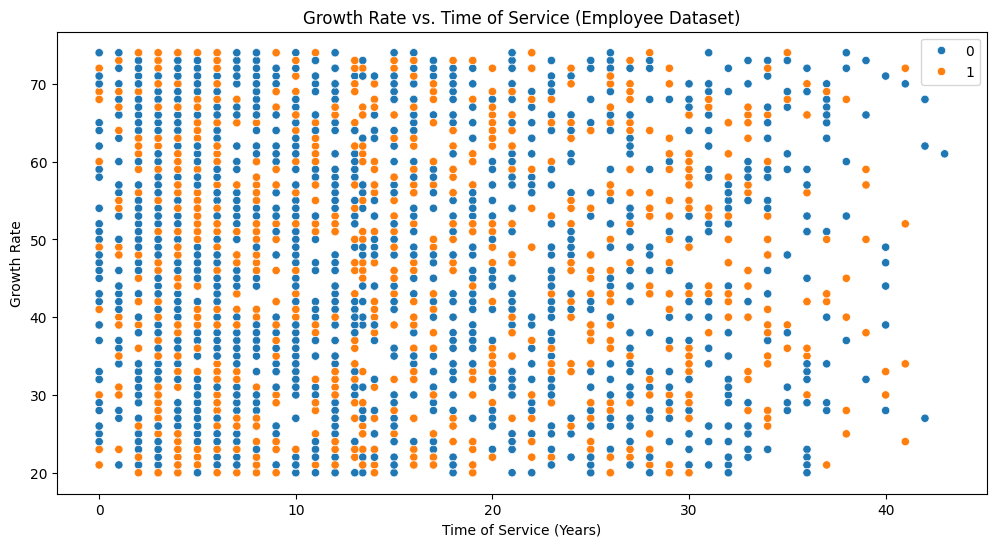

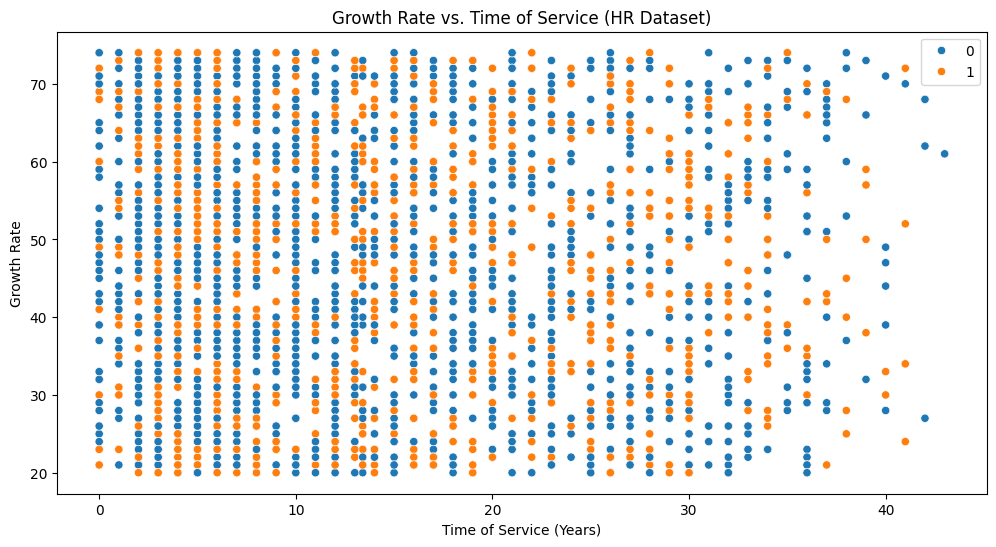

In [17]:
# Visualize growth_rate vs Time_of_service from Employee Dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(data=employee_df, x='Time_of_service', y='growth_rate', hue='Gender')
plt.title('Growth Rate vs. Time of Service (Employee Dataset)')
plt.xlabel('Time of Service (Years)')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

# Visualize growth_rate vs Time_of_service from HR Dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hr_df, x='Time_of_service', y='growth_rate', hue='Gender')
plt.title('Growth Rate vs. Time of Service (HR Dataset)')
plt.xlabel('Time of Service (Years)')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

12:27:32 - cmdstanpy - INFO - Chain [1] start processing
12:27:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1200x600 with 0 Axes>

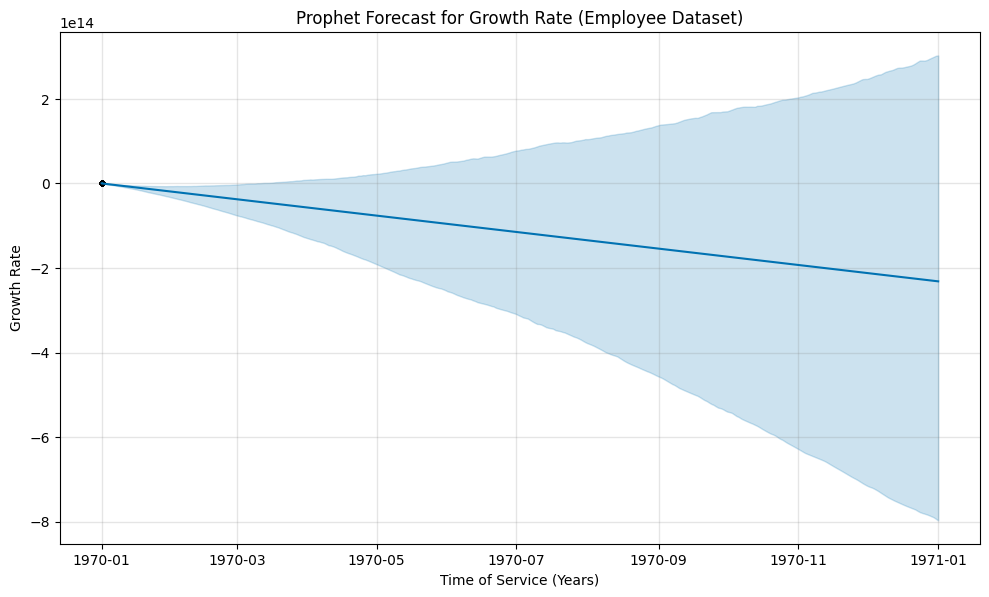

C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


<Figure size 1200x600 with 0 Axes>

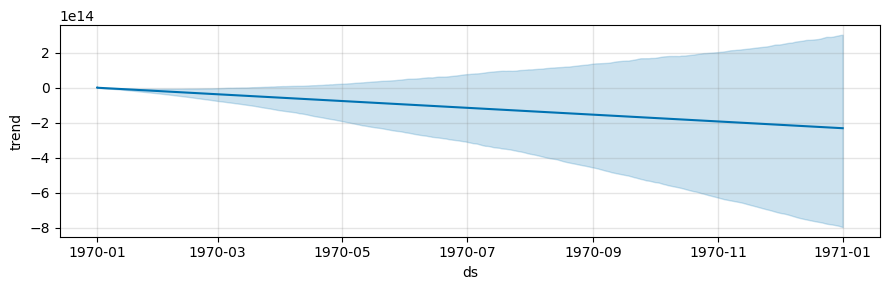

12:27:35 - cmdstanpy - INFO - Chain [1] start processing
12:27:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1200x600 with 0 Axes>

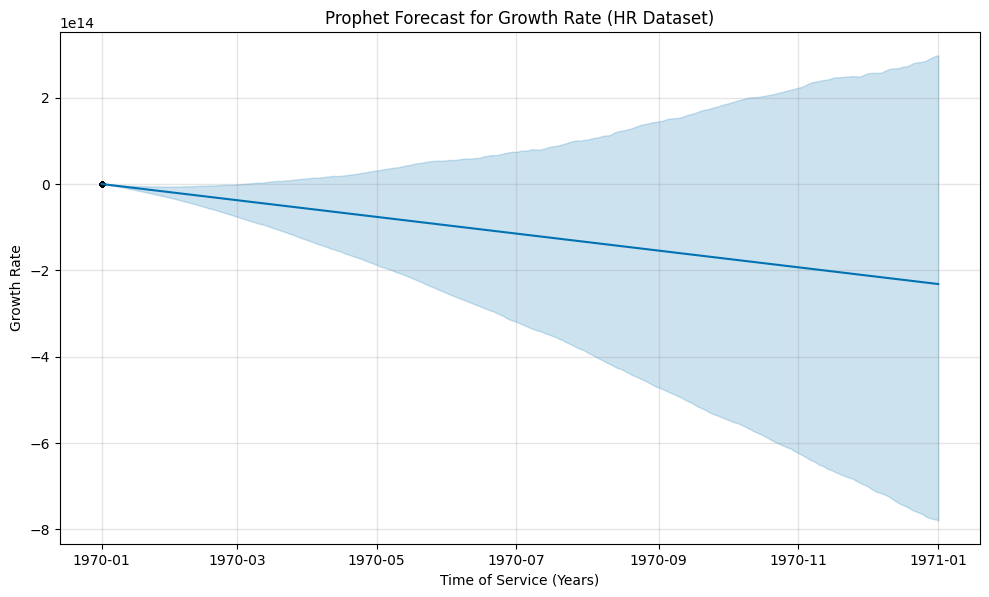

C:\Users\Gumede\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


<Figure size 1200x600 with 0 Axes>

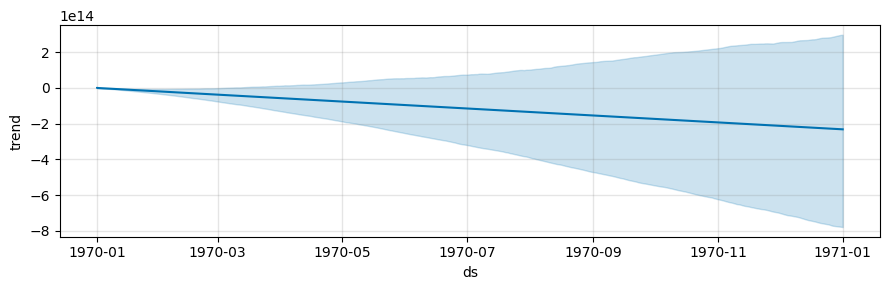

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet y

# Preparing the Employee dataset for Prophet
employee_prophet_df = employee_df[['Time_of_service', 'growth_rate']].rename(columns={'Time_of_service': 'ds', 'growth_rate': 'y'})

# Initializing and fiting the Prophet model for Employee dataset
model_employee = Prophet()
model_employee.fit(employee_prophet_df)

# Forecasting future values for Employee dataset
future_employee = model_employee.make_future_dataframe(periods=365) 
forecast_employee = model_employee.predict(future_employee)

# Ploting the forecast for Employee dataset
plt.figure(figsize=(12, 6))
model_employee.plot(forecast_employee)
plt.title('Prophet Forecast for Growth Rate (Employee Dataset)')
plt.xlabel('Time of Service (Years)')
plt.ylabel('Growth Rate')
plt.show()

# Ploting forecast components for Employee dataset
plt.figure(figsize=(12, 6))
model_employee.plot_components(forecast_employee)
plt.show()

# Preparing the HR dataset for Prophet
hr_prophet_df = hr_df[['Time_of_service', 'growth_rate']].rename(columns={'Time_of_service': 'ds', 'growth_rate': 'y'})

# Initializing and fiting the Prophet model for HR dataset
model_hr = Prophet()
model_hr.fit(hr_prophet_df)

# Forecasting future values for HR dataset
future_hr = model_hr.make_future_dataframe(periods=365)
forecast_hr = model_hr.predict(future_hr)

# Ploting the forecast for HR dataset
plt.figure(figsize=(12, 6))
model_hr.plot(forecast_hr)
plt.title('Prophet Forecast for Growth Rate (HR Dataset)')
plt.xlabel('Time of Service (Years)')
plt.ylabel('Growth Rate')
plt.show()

# Ploting forecast components for HR dataset
plt.figure(figsize=(12, 6))
model_hr.plot_components(forecast_hr)
plt.show()
